Total records: 67441
Matched users: 61154


/var/folders/85/jcjlc_dd7gd2m1cp2ps8kg9w0000gn/T/ipykernel_92205/2556818579.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


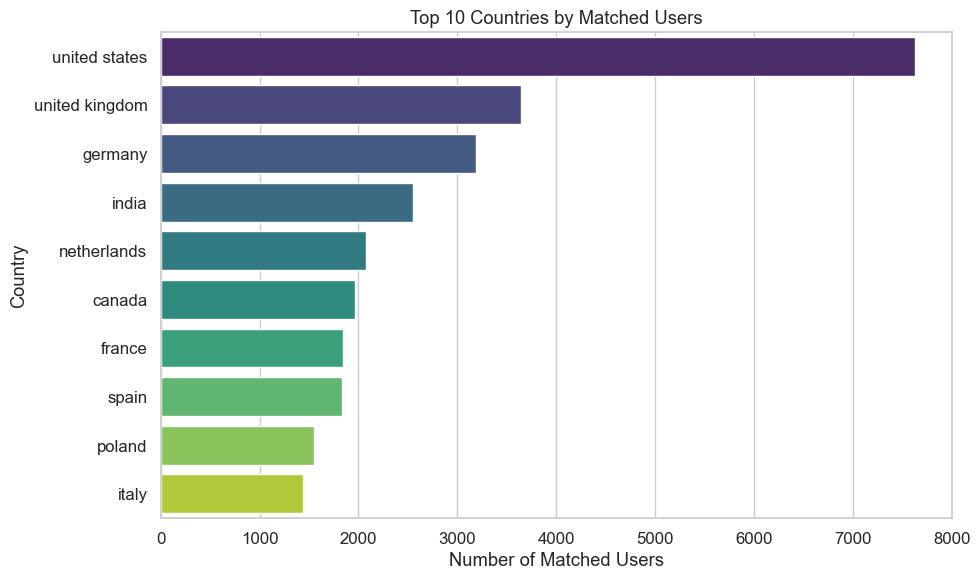

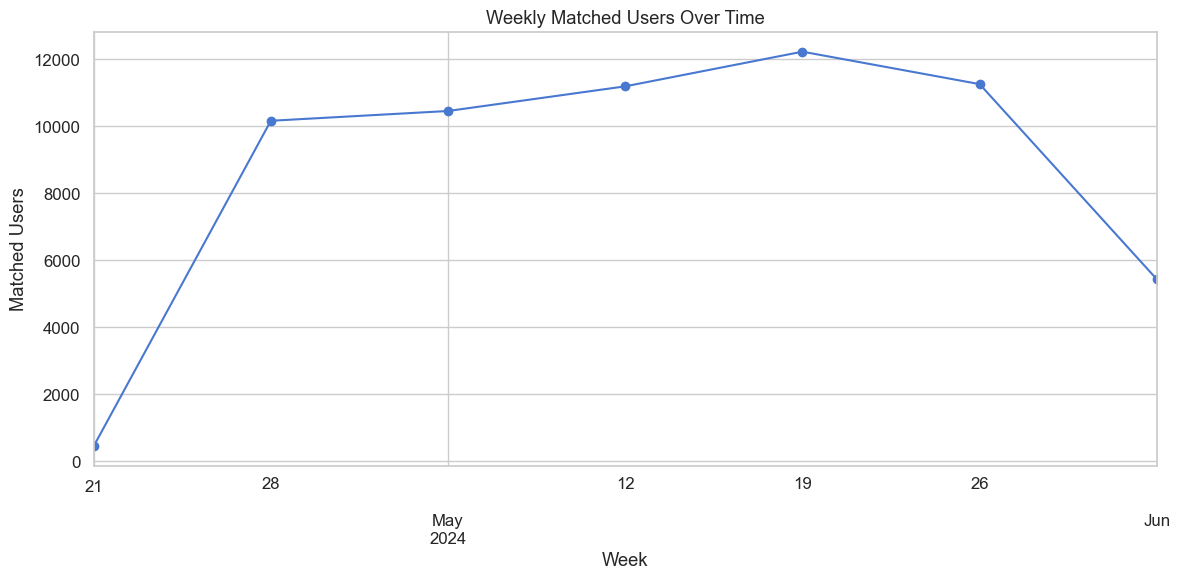

/var/folders/85/jcjlc_dd7gd2m1cp2ps8kg9w0000gn/T/ipykernel_92205/2556818579.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matched_df, y="page_category", order=matched_df["page_category"].value_counts().index, palette="coolwarm")


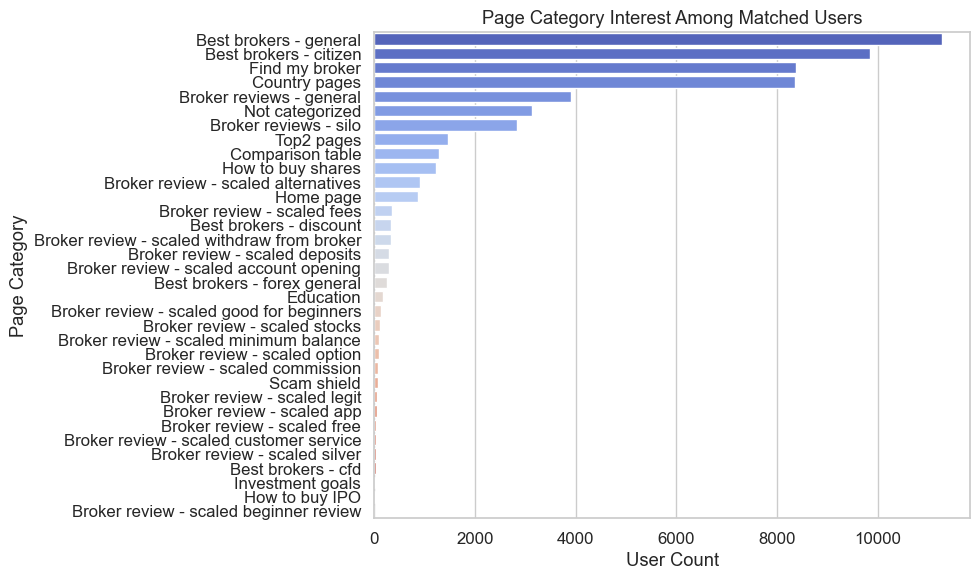

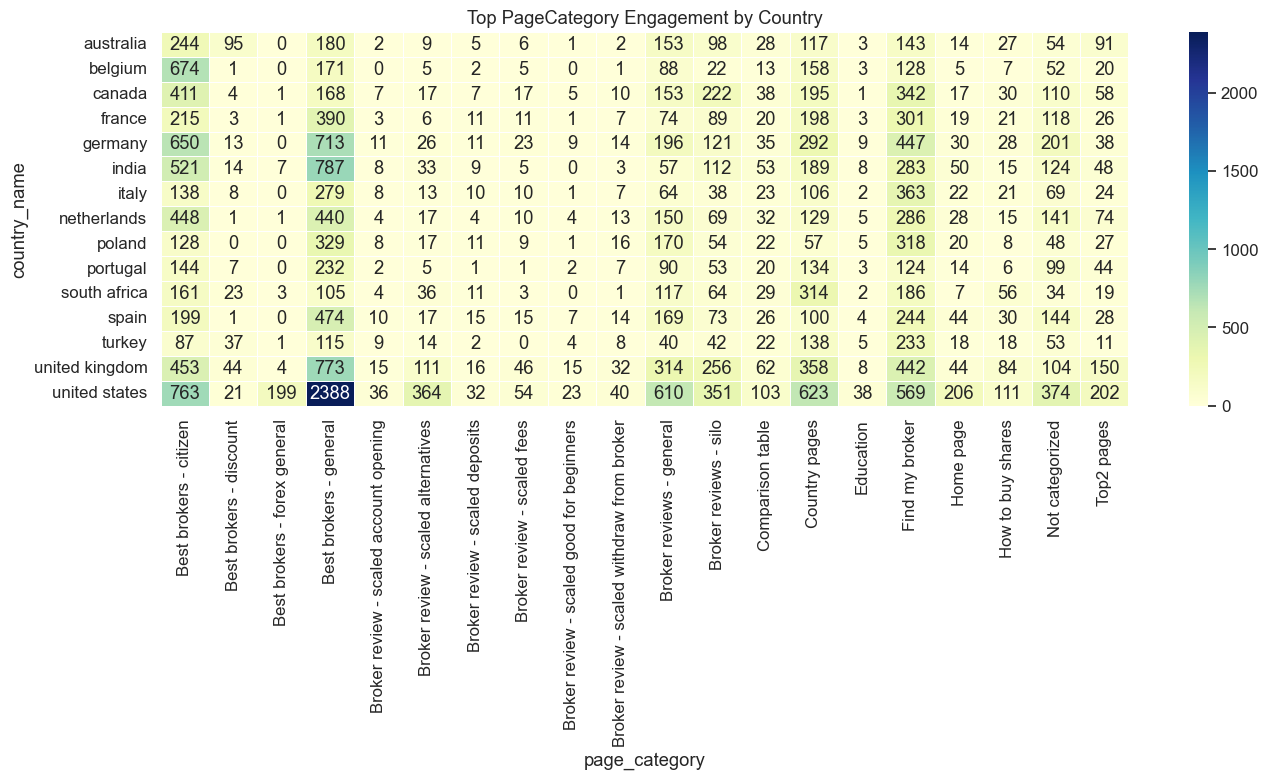

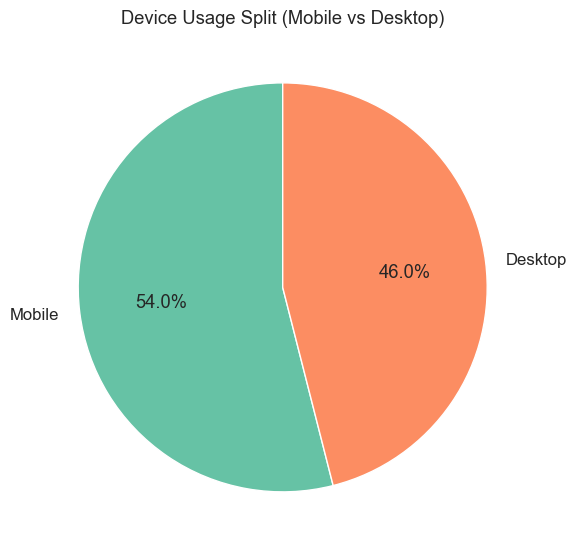

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent visualization style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load data
df = pd.read_csv("/Users/macbookpro/Documents/brokerchooser-etl/output/final_output.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# --- Basic Overview ---
print("Total records:", len(df))
print("Matched users:", df["was_matched"].sum())

# Convert timestamp
df["broker_timestamp"] = pd.to_datetime(df["broker_timestamp"])

# Filter for matched users
matched_df = df[df["was_matched"] == True]

# --- Top Countries by Matched Users ---
top_countries = matched_df["country_name"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Matched Users")
plt.xlabel("Number of Matched Users")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# --- Time Series: Weekly Match Activity ---
time_series = matched_df.set_index("broker_timestamp").resample("W")["id"].count()
plt.figure(figsize=(12,6))
time_series.plot(marker='o')
plt.title("Weekly Matched Users Over Time")
plt.xlabel("Week")
plt.ylabel("Matched Users")
plt.tight_layout()
plt.show()

# --- User Interest by Page Category ---
plt.figure(figsize=(10,6))
sns.countplot(data=matched_df, y="page_category", order=matched_df["page_category"].value_counts().index, palette="coolwarm")
plt.title("Page Category Interest Among Matched Users")
plt.xlabel("User Count")
plt.ylabel("Page Category")
plt.tight_layout()
plt.show()

# --- Heatmap: Top Page Category Engagement by Country ---
# Limit to top 15 countries
top_countries = matched_df["country_name"].value_counts().head(15).index
filtered_df = matched_df[matched_df["country_name"].isin(top_countries)]

# Limit to top 20 page categories
top_categories = matched_df["page_category"].value_counts().head(20).index
filtered_df = filtered_df[filtered_df["page_category"].isin(top_categories)]

# Pivot table
pivot = filtered_df.pivot_table(
    index="country_name",
    columns="page_category",
    values="id",
    aggfunc="count",
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5, annot=True, fmt="d")
plt.title("Top PageCategory Engagement by Country")
plt.tight_layout()
plt.show()

# --- Device Type Split ---
device_split = matched_df["is_mobile"].value_counts(normalize=True).rename({True: "Mobile", False: "Desktop"})
plt.figure(figsize=(6,6))
device_split.plot.pie(autopct='%1.1f%%', startangle=90, colors=["#66c2a5", "#fc8d62"])
plt.title("Device Usage Split (Mobile vs Desktop)")
plt.ylabel("")
plt.tight_layout()
plt.show()